index =  149
index_1 =  0


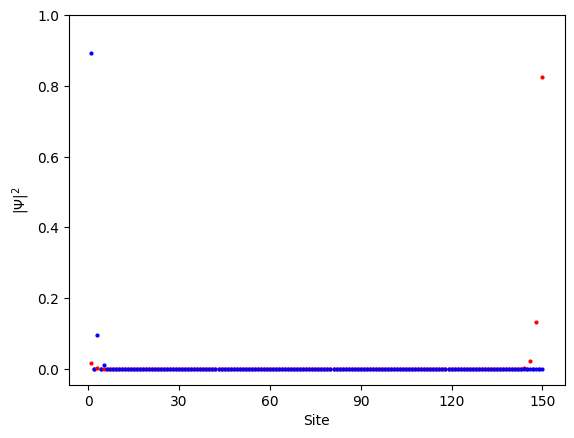

In [55]:
import matplotlib.pyplot as plt
import numpy as np

N = 150
H = np.zeros((N,N))
t_1 = 0.36

#Initialising variables
num = 0.0
den = 0.5*N*(N-1)
eigval = []
eigvec_array = []

#Generating Hamiltonian
for i in range (0, N-1):
    if(i % 2 == 0):
        H[i,i+1] = t_1 #t_1
        H[i+1,i] = t_1 #t_1
    elif(i % 2 == 1 and i < N-1):
        H[i,i+1] = 1.1 #t_2+g
        H[i+1,i] = 0.9 #t_2-g

#Calculating eigenvalues and eigenvectors
eigval, eigvec_array = np.linalg.eig(H)
eigvec = np.transpose(eigvec_array)
index = 0
index_1 = 0

#Finding index with lowest absolute eigenvalue (note that edge states are taken for energy  = 0)
for k in range (0, N):
    if(np.absolute(eigval[k]) < np.absolute(eigval[index])):
        index = k

#Finding index with second lowest eigenvalue (since hamiltonian is symmetric about zero, there will be two lowest eigenvalues)
for m in range(0, N):
    if((m != index) and (np.absolute(eigval[m]) < np.absolute(eigval[index_1]))):
        index_1 = m

#Printing indexes
print("index = ", index)
print("index_1 = ", index_1)

#Plotting probability density for both indexes
for site in range (0, N):
    psi_square = (np.absolute(eigvec[index][site]))**2
    psi_square_1 = (np.absolute(eigvec[index_1][site]))**2
    #print("site = ", site, "prob den = ", psi_square)
    plt.plot(site+1, psi_square, marker = 'o', markersize = '2', color = 'red')
    plt.plot(site+1, psi_square_1, marker = 'o', markersize = '2', color = 'blue')
    plt.xlabel("Site")
    plt.ylabel("$|\Psi|^{2}$")
    plt.xticks(np.arange(0, 160, 30))
    plt.yticks(np.arange(0, 1.1, 0.2))
plt.show()
